<a href="https://colab.research.google.com/github/vedmara/ALgorithms_python_lessons_1-8/blob/main/Assignment_Machine_LearningII_with_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BACKGROUND:**

The data is a marketing campaign data of a skin care clinic associated with its success.

**Description of variables**

          Success: Response to marketing campaign of Skin Care Clinic which

          offers both products and services. (1: email Opened, 0: email not opened)

          AGE: Age Group of Customer

          Recency_Service: Number of days since last service purchase

          Recency_Product: Number of days since last product purchase

          Bill_Service: Total bill amount for service in last 3 months

          Bill_Product: Total bill amount for products in last 3 months

          Gender (1: Male, 2: Female)

In [1]:
import pandas as pd
import numpy as np
#pip install yfinance before importing
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score,roc_curve, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data then fits the model
nn_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42, max_iter=300, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1))


In [2]:
data=pd.read_csv("/content/drive/MyDrive/Springboard_Python/Email Campaign.csv")
data.head()

,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


Data Preprocessing
Prepare data for modeling by coding categorical variables and dividing the data into features and target variable.

In [3]:
# Encode the AGE variable if it's categorical
data['AGE'] = data['AGE'].astype('category').cat.codes

# Define features and target variable
X = data.drop(columns=['SN', 'Success'])
y = data['Success']

In [4]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Decision Tree**

In [5]:
# Train the decision tree classifier using cross-validation
dt_model = DecisionTreeClassifier(random_state=42)
y_pred_dt = cross_val_predict(dt_model, X, y, cv=cv, method='predict')
dt_model.fit(X, y)

# Apply cut-off value of 0.50 to obtain predicted class labels
y_pred_dt_50 = (y_pred_dt >= 0.50).astype(int)

# Calculate sensitivity (recall) for Decision Tree
sensitivity_dt = recall_score(y, y_pred_dt_50)
print(f"Decision Tree Sensitivity (Recall) at threshold 0.50: {sensitivity_dt:.2f}")

# Print classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y, y_pred_dt_50))

Decision Tree Sensitivity (Recall) at threshold 0.50: 0.48
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       503
           1       0.43      0.48      0.45       180

    accuracy                           0.70       683
   macro avg       0.62      0.63      0.62       683
weighted avg       0.71      0.70      0.70       683



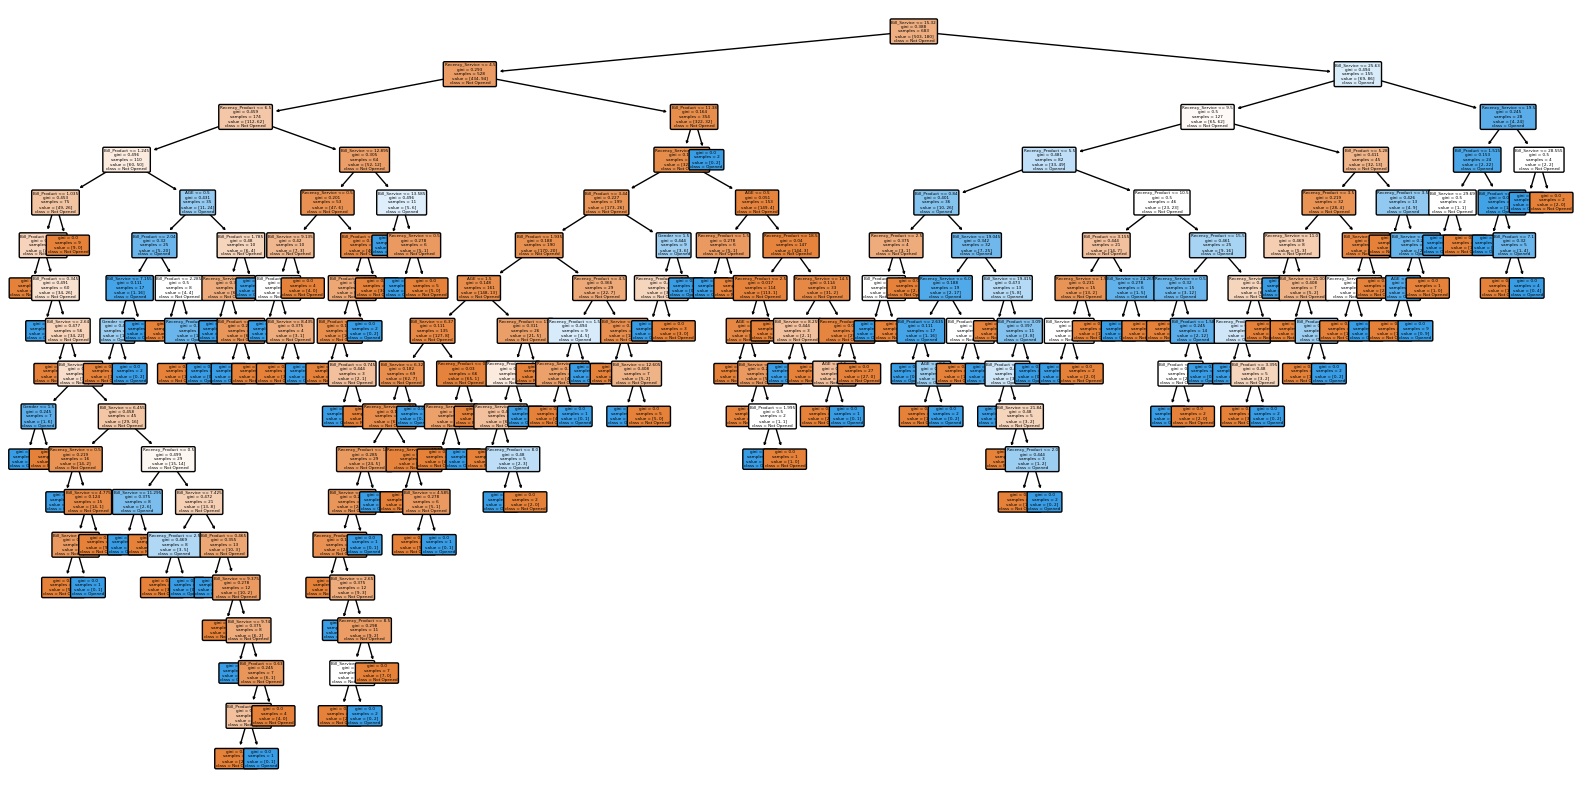

In [6]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Opened', 'Opened'], filled=True, rounded=True, fontsize=3) #we can change the fontsize parameter at our own request
plt.show()

Comment : The model accuracy is 70% and sensitivity is 48%

**2. Train and compare the performance of random forest with decision tree using ROC AUC metric.**

In [7]:
# Train the random forest classifier using cross-validation
rf_model = RandomForestClassifier(random_state=42)
y_pred_rf = cross_val_predict(rf_model, X, y, cv=cv, method='predict')
rf_model.fit(X, y)
# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       503
           1       0.67      0.46      0.55       180

    accuracy                           0.80       683
   macro avg       0.75      0.69      0.71       683
weighted avg       0.79      0.80      0.78       683



In [8]:
# Predict probabilities for ROC AUC
y_pred_prob_rf = cross_val_predict(rf_model, X, y, cv=cv, method='predict_proba')[:, 1]

In [9]:
# Calculate ROC AUC
roc_auc_dt = roc_auc_score(y, y_pred_dt_50)
roc_auc_rf = roc_auc_score(y, y_pred_prob_rf)

In [10]:
print(f"Decision Tree ROC AUC: {roc_auc_dt:.2f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

Decision Tree ROC AUC: 0.63
Random Forest ROC AUC: 0.80


In [11]:
# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y, y_pred_dt_50)
fpr_rf, tpr_rf, _ = roc_curve(y, y_pred_prob_rf)

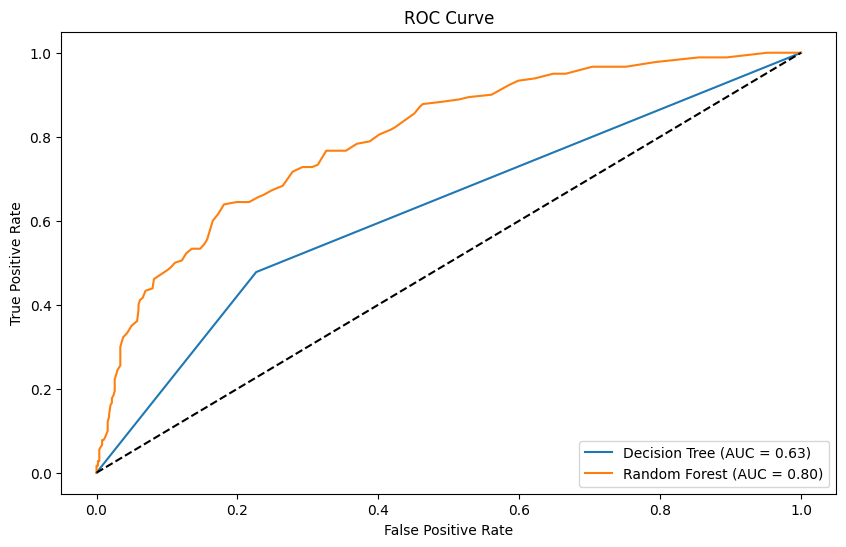

In [12]:
# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Comment: The higher ROC AUC of the Random Forest model (0.80) indicates it is more effective at distinguishing between the classes compared to the Decision Tree model (0.63). This suggests that for this dataset and problem, using a Random Forest is likely to yield better performance and more reliable predictions.

**3. Training a neural network classifier and evaluating its performance using ROC AUC.**

In [13]:
# Train the neural network classifier using cross-validation
nn_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42, max_iter=300, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1))
y_pred_nn = cross_val_predict(nn_model, X, y, cv=cv, method='predict')
nn_model.fit(X, y)

# Print classification report for Neural Network
print("Neural Network Classification Report:")
print(classification_report(y, y_pred_nn))

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       503
           1       0.54      0.38      0.45       180

    accuracy                           0.75       683
   macro avg       0.67      0.63      0.64       683
weighted avg       0.73      0.75      0.74       683



Comment : The model accuracy is 80% and sensitivity is 46%

In [14]:

roc_auc_nn = roc_auc_score(y, cross_val_predict(nn_model, X, y, cv=cv, method='predict_proba')[:, 1])

print(f"Neural Network ROC AUC: {roc_auc_nn:.2f}")

fpr_nn, tpr_nn, _ = roc_curve(y, cross_val_predict(nn_model, X, y, cv=cv, method='predict_proba')[:, 1])

Neural Network ROC AUC: 0.74


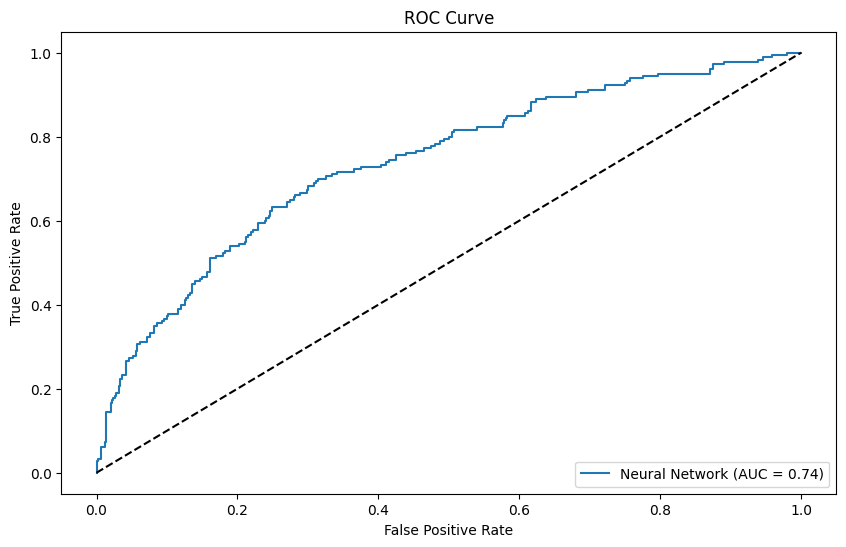

In [15]:
# Plot the ROC Neural Network
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

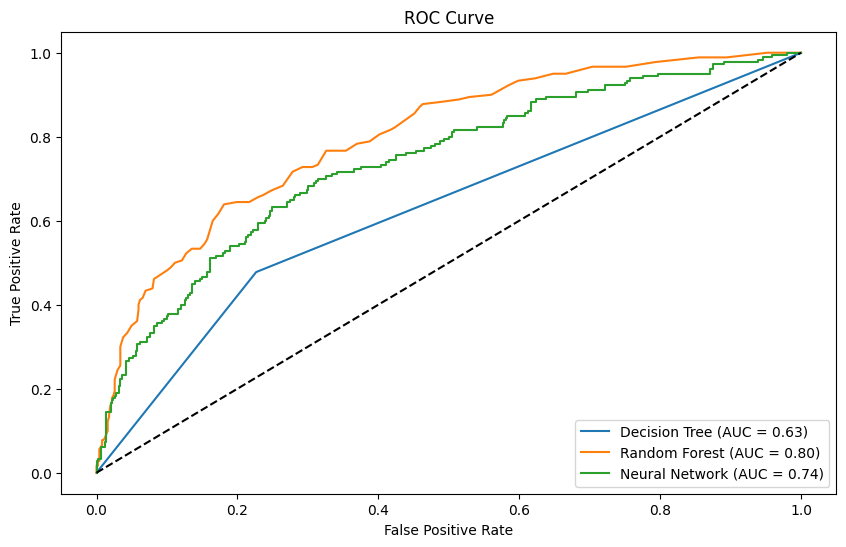

In [16]:
# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusion: Based on this analysis, the random forest model appears to outperform both the decision tree and neural network  models. However, further analysis and tuning may be required to enhance sensitivity for Class 1, particularly in identifying instances of email open events.**